11.1激活函数

relu函数是目前最受欢迎的激活函数，在x<0时，硬饱和，x>0时，导数为1，所以在x>0时保持梯度不衰减，从而缓解梯度消失问题，能更快收敛，并提供神经网络的稀疏表达能力。但随着训练的进行，部分输入会落入硬饱和区，导致对应的权重无法更新，称为“神经元死亡”。
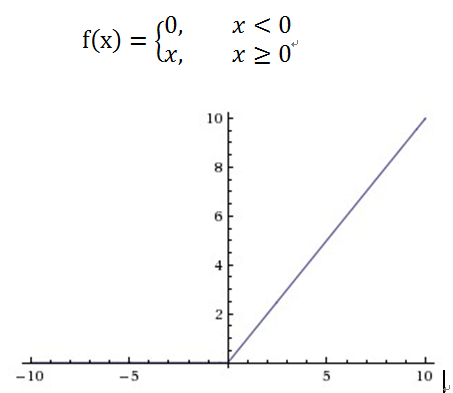
图11-4 Relu函数图
	下面我们同一个实例，来说明如何使用tensorflow中relu函数


In [1]:
import tensorflow as tf
sess = tf.InteractiveSession()
# 产生一个4x4的矩阵，满足均值为0，标准差为1的正态分布
matrix_input = tf.Variable(tf.random_normal([4,4],mean=0.0, stddev=1.0))
# 对变量初始化，这里对a进行初始化
tf.global_variables_initializer().run()
# 输出原始矩阵的值
print("原始矩阵:\n",matrix_input.eval())
# 对原始矩阵用Relu函数进行激活处理
matrix_output = tf.nn.relu(matrix_input)
# 输出处理后的矩阵的值
print("Relu函数激活后的矩阵:\n",matrix_output.eval())


原始矩阵:
 [[-0.96769428  0.40001294 -1.29136431  1.48990095]
 [ 0.26872483 -0.30545855  1.00806963  0.32692626]
 [-1.31856704  0.66385174 -0.1671156   0.19092993]
 [-0.63467354 -0.60255975 -0.5589956   2.26608419]]
Relu函数激活后的矩阵:
 [[ 0.          0.40001294  0.          1.48990095]
 [ 0.26872483  0.          1.00806963  0.32692626]
 [ 0.          0.66385174  0.          0.19092993]
 [ 0.          0.          0.          2.26608419]]


11.2.1sigmoid_cross_entropy_with_logits函数

在深度学习中，分类问题的代价函数一般采用交叉熵函数，以下为使用该函数的代码实例

In [3]:
import tensorflow as tf
import numpy as np
def sigmoid(x):
    return 1.0/(1+np.exp(-x))
#定义一个5个样本3种分类的问题，且每个样本可以属于多种分类
y = np.array([[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1]]) 
logits = np.array([[10,3.8,2],[8,10.9,1],[1,2,7.4],[4.8,6.5,1.2],[3.3,8.8,1.9]])

#按自定义计算公式计算的结果
y_pred = sigmoid(logits)
output1 = -y*np.log(y_pred)-(1-y)*np.log(1-y_pred)
print('Self_Define_output1 : ', output1)
with tf.Session() as sess:
  y = np.array(y).astype(np.float64) # labels是float64的数据类型
  #按Tensorflow函数计算结果，与自定义计算公式计算结果相同
  output2 = sess.run(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=logits))
  print('sigmoid_cross_entropy_with_logits : ', output2)
  #调用tf.reduce_mean（） 运算结果的平均值  
  reduce_mean = sess.run(tf.reduce_mean(output2))
  print('reduce_mean : ',reduce_mean)


Self_Define_output1 :  [[  4.53988992e-05   3.82212422e+00   2.12692801e+00]
 [  8.00033541e+00   1.84580636e-05   1.31326169e+00]
 [  1.31326169e+00   2.12692801e+00   6.11066022e-04]
 [  8.19606734e-03   1.50231016e-03   1.46328247e+00]
 [  3.33621926e+00   1.50721716e-04   1.39386758e-01]]
sigmoid_cross_entropy_with_logits :  [[  4.53988992e-05   3.82212422e+00   2.12692801e+00]
 [  8.00033541e+00   1.84580636e-05   1.31326169e+00]
 [  1.31326169e+00   2.12692801e+00   6.11066022e-04]
 [  8.19606734e-03   1.50231016e-03   1.46328247e+00]
 [  3.33621926e+00   1.50721716e-04   1.39386758e-01]]
reduce_mean :  1.57681676844


11.2.3sparse_softmax_cross_entropy_with_logits函数
以下为实现该函数的代码实例

In [4]:
import tensorflow as tf
labels = [0,2]
logits = [[2,0.5,1],
          [0.1,1,3]]

logits_scaled = tf.nn.softmax(logits)
result1 = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits)
with tf.Session() as sess:
    print(sess.run(result1))


[ 0.46436879  0.17425454]


11.2.4weighted_cross_entropy_with_logits函数
以下为实现该函数的代码实例

In [5]:
import numpy as np
import tensorflow as tf

input_data = tf.Variable(np.random.rand(3, 3), dtype=tf.float32)
# np.random.rand()传入一个shape,返回一个在[0,1)区间符合均匀分布的array
output = tf.nn.weighted_cross_entropy_with_logits(logits=input_data,
                                                  targets=[[1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0]],
                                                  pos_weight=2.0)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(output))


[[ 0.65293074  1.00653541  1.08474898]
 [ 1.17876077  1.19925404  1.0409627 ]
 [ 0.97154582  0.79415023  0.68449312]]
